# Financial Data Analysis Project

## Introduction:
In this Jupyter notebook, I go through the end-to-end process of collecting, cleaning, exploring, analyzing, and visualizing data from Kaggle.com regarding financial metrics on S&P 500 companies. Analysis is done using Python and the following libraries/modules:
- numpy
- pandas
- matplotlib
- seaborn
- scikit-learn

### Goals / Objectives:

1. How does net income differ by industry/sector? What is the distribution of industries like for companies in the S&P 500?
2. How can information on these companies be used by investors to make financial decisions?
3. What relations exist between S&P 500 companies and key financial metrics?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import math

## Collecting the Data:
Step 1: Importing datasets and initial look into the data

The following datasets were found on Kaggle.com and were loaded in using pandas dataframes. The datasets contain quantitative information on key financial metrics including net income and market cap, in addition to categorical data such as industry, sub-industry, and headquarters location

In [2]:
df1 = pd.read_csv('financial data sp500 companies.csv', encoding='windows-1252')
df2 = pd.read_csv('sp500-companies.csv', encoding='windows-1252')
df3 = pd.read_csv('constituents-financials_csv.csv', encoding='windows-1252')

print('df1 columns:\n', df1.columns, '\n')
print('df2 columns:\n', df2.columns, '\n')
print('df3 columns:\n', df3.columns, '\n')

df1 columns:
 Index(['Unnamed: 0', 'date', 'firm', 'Ticker', 'Research Development',
       'Income Before Tax', 'Net Income', 'Selling General Administrative',
       'Gross Profit', 'Ebit', 'Operating Income', 'Interest Expense',
       'Income Tax Expense', 'Total Revenue', 'Total Operating Expenses',
       'Cost Of Revenue', 'Total Other Income Expense Net',
       'Net Income From Continuing Ops',
       'Net Income Applicable To Common Shares'],
      dtype='object') 

df2 columns:
 Index(['Ticker', 'Name', 'Industry', 'Sub-Industry', 'Headquarters Location',
       'Date added', 'Founded'],
      dtype='object') 

df3 columns:
 Index(['Symbol', 'Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings'],
      dtype='object') 



In [3]:
# Merging data into master dataframe
df_merge = df1.merge(df2, how='inner', on='Ticker')
df_merge = df_merge.merge(df3, how='inner', left_on='Ticker', right_on='Symbol')

pd.set_option('display.max_columns', None)
df_merge.head()

,Unnamed: 0,date,firm,Ticker,Research Development,Income Before Tax,Net Income,Selling General Administrative,Gross Profit,Ebit,Operating Income,Interest Expense,Income Tax Expense,Total Revenue,Total Operating Expenses,Cost Of Revenue,Total Other Income Expense Net,Net Income From Continuing Ops,Net Income Applicable To Common Shares,Name_x,Industry,Sub-Industry,Headquarters Location,Date added,Founded,Symbol,Name_y,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,0,2021-09-30,3M,MMM,482000000.0,1.761000e+09,1.434000e+09,1.739000e+09,4.089000e+09,1.868000e+09,1.868000e+09,-117000000.0,324000000.0,8.942000e+09,7.074000e+09,4.853000e+09,-107000000.0,1.437000e+09,1.434000e+09,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",3/4/1957,1902,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.49,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,1,2021-06-30,3M,MMM,514000000.0,1.940000e+09,1.524000e+09,1.666000e+09,4.231000e+09,2.051000e+09,2.051000e+09,-121000000.0,415000000.0,8.950000e+09,6.899000e+09,4.719000e+09,-111000000.0,1.525000e+09,1.524000e+09,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",3/4/1957,1902,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.49,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,2,2021-03-31,3M,MMM,520000000.0,1.946000e+09,1.624000e+09,1.720000e+09,4.327000e+09,2.087000e+09,2.087000e+09,-132000000.0,319000000.0,8.851000e+09,6.764000e+09,4.524000e+09,-141000000.0,1.627000e+09,1.624000e+09,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",3/4/1957,1902,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.49,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,3,2020-12-31,3M,MMM,449000000.0,1.706000e+09,1.389000e+09,1.814000e+09,4.246000e+09,1.983000e+09,1.983000e+09,-141000000.0,316000000.0,8.583000e+09,6.600000e+09,4.337000e+09,-277000000.0,1.390000e+09,1.389000e+09,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",3/4/1957,1902,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.49,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,4,2021-09-30,3M,MMM,482000000.0,1.761000e+09,1.434000e+09,1.739000e+09,4.089000e+09,1.868000e+09,1.868000e+09,-117000000.0,324000000.0,8.942000e+09,7.074000e+09,4.853000e+09,-107000000.0,1.437000e+09,1.434000e+09,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",3/4/1957,1902,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.49,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [4]:
# Looking at information on each column
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1572 entries, 0 to 1571
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              1572 non-null   int64  
 1   date                                    1572 non-null   object 
 2   firm                                    1572 non-null   object 
 3   Ticker                                  1572 non-null   object 
 4   Research Development                    439 non-null    float64
 5   Income Before Tax                       1572 non-null   float64
 6   Net Income                              1572 non-null   float64
 7   Selling General Administrative          1524 non-null   float64
 8   Gross Profit                            1572 non-null   float64
 9   Ebit                                    1572 non-null   float64
 10  Operating Income                        1572 non-null   floa

In [5]:
# Dimensions of dataframe
print('Number of rows and columns', df_merge.shape)

# checking for null/NaN values in each column
df_merge.isnull().sum()

Number of rows and columns (1572, 39)


Unnamed: 0                                   0
date                                         0
firm                                         0
Ticker                                       0
Research Development                      1133
Income Before Tax                            0
Net Income                                   0
Selling General Administrative              48
Gross Profit                                 0
Ebit                                         0
Operating Income                             0
Interest Expense                           142
Income Tax Expense                           0
Total Revenue                                0
Total Operating Expenses                     0
Cost Of Revenue                              0
Total Other Income Expense Net               0
Net Income From Continuing Ops               0
Net Income Applicable To Common Shares       0
Name_x                                       0
Industry                                     0
Sub-Industry 

## Data Cleaning and Preprocessing:
Step 2: Data preparation before analysis

Preparation includes removal of unnecessary columns, standardizing column headers, changing column datatypes, adding new columns, changing the format of numbers, dealing with null/NaN values, etc.

In [6]:
# Removing unwanted columns
df_merge = df_merge.drop(columns=['Name_x','Name_y','Symbol','Sector','SEC Filings',
                                  '52 Week Low','52 Week High','Price','Date added',
                                  'Founded','Research Development', 'Unnamed: 0'],
                         axis=1)

# renaming columns for consistency in capitalization
df_merge = df_merge.rename(columns={'date':'Date',
                                    'firm':'Firm',
                                    'Ebit':'EBIT'})

# changing Date column into a datetime data type
df_merge['Date'] = pd.to_datetime(df_merge['Date'])

# Separating headquarter city and state into its own columns
df_merge[['Headquarter City', 'Headquarter State']] = df_merge['Headquarters Location'].str.split(',',1,expand=True)
df_merge = df_merge.drop(columns='Headquarters Location', axis=1)

# changing format of numbers
pd.options.display.float_format = '{:.2f}'.format

df_merge

C:\Users\joey2\AppData\Local\Temp\ipykernel_21052\3296860502.py:16: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_merge[['Headquarter City', 'Headquarter State']] = df_merge['Headquarters Location'].str.split(',',1,expand=True)


,Date,Firm,Ticker,Income Before Tax,Net Income,Selling General Administrative,Gross Profit,EBIT,Operating Income,Interest Expense,Income Tax Expense,Total Revenue,Total Operating Expenses,Cost Of Revenue,Total Other Income Expense Net,Net Income From Continuing Ops,Net Income Applicable To Common Shares,Industry,Sub-Industry,Price/Earnings,Dividend Yield,Earnings/Share,Market Cap,EBITDA,Price/Sales,Price/Book,Headquarter City,Headquarter State
0,2021-09-30,3M,MMM,1761000000.00,1434000000.00,1739000000.00,4089000000.00,1868000000.00,1868000000.00,-117000000.00,324000000.00,8942000000.00,7074000000.00,4853000000.00,-107000000.00,1437000000.00,1434000000.00,Industrials,Industrial Conglomerates,24.31,2.33,7.92,138721055226,9048000000.00,4.39,11.34,Saint Paul,Minnesota
1,2021-06-30,3M,MMM,1940000000.00,1524000000.00,1666000000.00,4231000000.00,2051000000.00,2051000000.00,-121000000.00,415000000.00,8950000000.00,6899000000.00,4719000000.00,-111000000.00,1525000000.00,1524000000.00,Industrials,Industrial Conglomerates,24.31,2.33,7.92,138721055226,9048000000.00,4.39,11.34,Saint Paul,Minnesota
2,2021-03-31,3M,MMM,1946000000.00,1624000000.00,1720000000.00,4327000000.00,2087000000.00,2087000000.00,-132000000.00,319000000.00,8851000000.00,6764000000.00,4524000000.00,-141000000.00,1627000000.00,1624000000.00,Industrials,Industrial Conglomerates,24.31,2.33,7.92,138721055226,9048000000.00,4.39,11.34,Saint Paul,Minnesota
3,2020-12-31,3M,MMM,1706000000.00,1389000000.00,1814000000.00,4246000000.00,1983000000.00,1983000000.00,-141000000.00,316000000.00,8583000000.00,6600000000.00,4337000000.00,-277000000.00,1390000000.00,1389000000.00,Industrials,Industrial Conglomerates,24.31,2.33,7.92,138721055226,9048000000.00,4.39,11.34,Saint Paul,Minnesota
4,2021-09-30,3M,MMM,1761000000.00,1434000000.00,1739000000.00,4089000000.00,1868000000.00,1868000000.00,-117000000.00,324000000.00,8942000000.00,7074000000.00,4853000000.00,-107000000.00,1437000000.00,1434000000.00,Industrials,Industrial Conglomerates,24.31,2.33,7.92,138721055226,9048000000.00,4.39,11.34,Saint Paul,Minnesota
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,2020-09-30,Zions Bancorp,ZION,215000000.00,175000000.00,353000000.00,667000000.00,0.00,222000000.00,NaN,40000000.00,667000000.00,445000000.00,0.00,-7000000.00,175000000.00,166000000.00,Financials,Regional Banks,17.73,1.48,2.60,10670678640,0.00,3.79,1.42,Salt Lake City,Utah
1568,2021-06-30,Zoetis,ZTS,636000000.00,512000000.00,495000000.00,1382000000.00,726000000.00,726000000.00,-57000000.00,125000000.00,1948000000.00,1222000000.00,566000000.00,-90000000.00,511000000.00,512000000.00,Health Care,Pharmaceuticals,32.80,0.68,1.65,35991109776,1734000000.00,9.28,18.09,Parsippany,New Jersey
1569,2021-03-31,Zoetis,ZTS,687000000.00,559000000.00,409000000.00,1323000000.00,756000000.00,756000000.00,-57000000.00,129000000.00,1871000000.00,1115000000.00,548000000.00,-69000000.00,558000000.00,559000000.00,Health Care,Pharmaceuticals,32.80,0.68,1.65,35991109776,1734000000.00,9.28,18.09,Parsippany,New Jersey
1570,2020-12-31,Zoetis,ZTS,420000000.00,359000000.00,518000000.00,1221000000.00,530000000.00,530000000.00,-58000000.00,62000000.00,1807000000.00,1277000000.00,586000000.00,-110000000.00,358000000.00,359000000.00,Health Care,Pharmaceuticals,32.80,0.68,1.65,35991109776,1734000000.00,9.28,18.09,Parsippany,New Jersey


In [7]:
# grouping data by Ticker symbol and taking the average for numerical data
df_summary = df_merge.groupby('Ticker').mean()
pd.merge(df_summary, df2, on='Ticker')
df_summary = df_summary.merge(df2,on='Ticker')
df_summary[['Headquarter City', 'Headquarter State']] = df_summary['Headquarters Location'].str.split(',',1,expand=True)
df_summary = df_summary.drop(columns=['Headquarters Location','Sub-Industry','Date added','Founded','Price/Sales','Price/Book',
                                      'Total Other Income Expense Net','Net Income From Continuing Ops','Net Income Applicable To Common Shares',
                                      'Income Tax Expense','Interest Expense','Selling General Administrative','EBIT','EBITDA'],
                           axis=1)
df_summary

C:\Users\joey2\AppData\Local\Temp\ipykernel_21052\907002624.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_summary = df_merge.groupby('Ticker').mean()
C:\Users\joey2\AppData\Local\Temp\ipykernel_21052\907002624.py:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_summary[['Headquarter City', 'Headquarter State']] = df_summary['Headquarters Location'].str.split(',',1,expand=True)


,Ticker,Income Before Tax,Net Income,Gross Profit,Operating Income,Total Revenue,Total Operating Expenses,Cost Of Revenue,Price/Earnings,Dividend Yield,Earnings/Share,Market Cap,Name,Industry,Headquarter City,Headquarter State
0,A,298750000.00,247500000.00,823750000.00,329500000.00,1535500000.00,1206000000.00,711750000.00,27.45,0.88,2.10,21984606918.00,Agilent Technologies,Health Care,Santa Clara,California
1,AAL,-1867000000.00,-1452000000.00,-1107750000.00,-2465500000.00,4671750000.00,7137250000.00,5779500000.00,9.92,0.78,3.91,24594852352.00,American Airlines Group,Industrials,Fort Worth,Texas
2,AAP,241769500.00,181408750.00,1301095875.00,271857000.00,2904773125.00,1359017750.00,825785000.00,19.54,0.22,6.19,8123611867.00,Advance Auto Parts,Consumer Discretionary,Raleigh,North Carolina
3,AAPL,25215000000.00,21700500000.00,35587750000.00,24984500000.00,86788750000.00,61804250000.00,51201000000.00,16.86,1.58,9.20,809508034020.00,Apple Inc.,Information Technology,Cupertino,California
4,ABBV,1802750000.00,1883500000.00,9681250000.00,4866750000.00,13792250000.00,8925500000.00,4111000000.00,19.41,2.50,3.29,181386347059.00,AbbVie,Health Care,North Chicago,Illinois
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,XYL,115000000.00,96250000.00,500750000.00,157000000.00,1300000000.00,1143000000.00,799250000.00,30.94,1.17,1.83,12915021000.00,Xylem Inc.,Industrials,White Plains,New York
388,YUM,371000000.00,333000000.00,765000000.00,522500000.00,1569750000.00,1047250000.00,804750000.00,27.25,1.80,4.07,27003303098.00,Yum! Brands,Consumer Discretionary,Louisville,Kentucky
389,ZBH,211475000.00,229050000.00,1395025000.00,337475000.00,1972225000.00,1634750000.00,577200000.00,14.32,0.79,9.01,24454698119.00,Zimmer Biomet,Health Care,Warsaw,Indiana
390,ZION,360000000.00,283750000.00,791250000.00,374250000.00,791250000.00,417000000.00,0.00,17.73,1.48,2.60,10670678640.00,Zions Bancorporation,Financials,Salt Lake City,Utah


In [8]:
# Taking a look at df_summary
companies = len(pd.unique(df_summary['Ticker']))
print('Number of companies in dataset:', companies,'\n')

print('Number of rows and columns:', df_summary.shape,'\n')

print('Column names:\n', df_summary.columns,'\n')

Number of companies in dataset: 392 

Number of rows and columns: (392, 16) 

Column names:
 Index(['Ticker', 'Income Before Tax', 'Net Income', 'Gross Profit',
       'Operating Income', 'Total Revenue', 'Total Operating Expenses',
       'Cost Of Revenue', 'Price/Earnings', 'Dividend Yield', 'Earnings/Share',
       'Market Cap', 'Name', 'Industry', 'Headquarter City',
       'Headquarter State'],
      dtype='object') 



In [9]:
# Descriptive statistics about the data
df_summary.describe()

,Income Before Tax,Net Income,Gross Profit,Operating Income,Total Revenue,Total Operating Expenses,Cost Of Revenue,Price/Earnings,Dividend Yield,Earnings/Share,Market Cap
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00,391.00,392.00,392.00,392.00
mean,1016427966.20,832805971.94,2961693743.94,1178744603.32,7636393858.74,6454656848.85,4672715695.79,25.81,1.92,4.12,56071215535.08
std,2459330011.39,2076941368.76,5455696290.47,2382965163.69,14183436175.13,12813726221.59,10246430486.48,43.13,1.42,5.05,96463887585.23
min,-4271500000.00,-3332500000.00,-1107750000.00,-2465500000.00,9031500.00,114161500.00,0.00,-251.53,0.00,-19.94,4653993594.00
25%,196263125.00,169456937.50,712300000.00,272451750.00,1529562500.00,1135675000.00,535606125.00,15.96,0.86,1.66,14382573423.25
50%,411400000.00,343475000.00,1218000000.00,532290750.00,3090250000.00,2470062625.00,1616737500.00,19.96,1.87,3.08,25311277132.00
75%,963625000.00,804500000.00,2607500000.00,1102501437.50,6443807437.50,5193172375.00,3462187500.00,25.90,2.79,5.46,51006755606.75
max,25215000000.00,21700500000.00,45082250000.00,24984500000.00,141536250000.00,134754250000.00,106013750000.00,520.15,7.71,44.09,809508034020.00


In [10]:
# checking for null/NaN values in each column
df_summary.isnull().sum()

Ticker                      0
Income Before Tax           0
Net Income                  0
Gross Profit                0
Operating Income            0
Total Revenue               0
Total Operating Expenses    0
Cost Of Revenue             0
Price/Earnings              1
Dividend Yield              0
Earnings/Share              0
Market Cap                  0
Name                        0
Industry                    0
Headquarter City            0
Headquarter State           0
dtype: int64

In [11]:
# seeing how many unique entries there are in each column
df_summary.nunique()

Ticker                      392
Income Before Tax           387
Net Income                  386
Gross Profit                389
Operating Income            386
Total Revenue               387
Total Operating Expenses    387
Cost Of Revenue             368
Price/Earnings              367
Dividend Yield              335
Earnings/Share              328
Market Cap                  392
Name                        392
Industry                     11
Headquarter City            196
Headquarter State            49
dtype: int64

In [12]:
# companies with highest market cap
df_summary.sort_values(by='Market Cap', ascending=False).head(10)

,Ticker,Income Before Tax,Net Income,Gross Profit,Operating Income,Total Revenue,Total Operating Expenses,Cost Of Revenue,Price/Earnings,Dividend Yield,Earnings/Share,Market Cap,Name,Industry,Headquarter City,Headquarter State
3,AAPL,25215000000.00,21700500000.00,35587750000.00,24984500000.00,86788750000.00,61804250000.00,51201000000.00,16.86,1.58,9.20,809508034020.00,Apple Inc.,Information Technology,Cupertino,California
160,GOOGL,18829000000.00,15732250000.00,30684500000.00,15665500000.00,55066250000.00,39400750000.00,24381750000.00,31.48,0.00,22.27,733823966137.00,Alphabet Inc. (Class A),Communication Services,Mountain View,California
159,GOOG,18829000000.00,15732250000.00,30684500000.00,15665500000.00,55066250000.00,39400750000.00,24381750000.00,40.29,0.00,22.27,728535558140.00,Alphabet Inc. (Class C),Communication Services,Mountain View,California
252,MSFT,17775500000.00,15317750000.00,28964000000.00,17479000000.00,42022000000.00,24543000000.00,13058000000.00,25.76,1.87,2.97,689978437468.00,Microsoft,Information Technology,Redmond,Washington
32,AMZN,8399000000.00,7359500000.00,45082250000.00,7408500000.00,110824500000.00,103416000000.00,65742250000.00,296.16,0.00,6.16,685873374731.00,Amazon,Consumer Discretionary,Seattle,Washington
205,JPM,14880000000.00,11956750000.00,32208750000.00,15133250000.00,32208750000.00,17075500000.00,0.00,15.43,1.98,6.30,386613611000.00,JPMorgan Chase,Financials,New York City,New York
203,JNJ,5034750000.00,4441750000.00,14966000000.00,5792000000.00,22297500000.00,16505500000.00,7331500000.00,17.31,2.56,0.39,353062464971.00,Johnson & Johnson,Health Care,New Brunswick,New Jersey
385,XOM,-4271500000.00,-3332500000.00,17033250000.00,1597500000.00,53969750000.00,52372250000.00,36936500000.00,21.37,4.00,1.88,326148660000.00,ExxonMobil,Energy,Irving,Texas
49,BAC,8069250000.00,7608750000.00,22801000000.00,8069250000.00,22801000000.00,14731750000.00,0.00,16.34,1.54,1.55,321478200969.00,Bank of America,Financials,Charlotte,North Carolina
380,WMT,4072250000.00,2512500000.00,35522500000.00,6782000000.00,141536250000.00,134754250000.00,106013750000.00,23.10,1.98,4.39,304680931618.00,Walmart,Consumer Staples,Bentonville,Arkansas


## Exploratory Data Analysis / Data Visualization:
Step 3: Analyzing data to find patterns, relationships, and trends

Visualizing the data using matplotlib and seaborn to obtain insights and provide strategic recommendations. Also using scikit-learn to model the data, specially with linear regression.

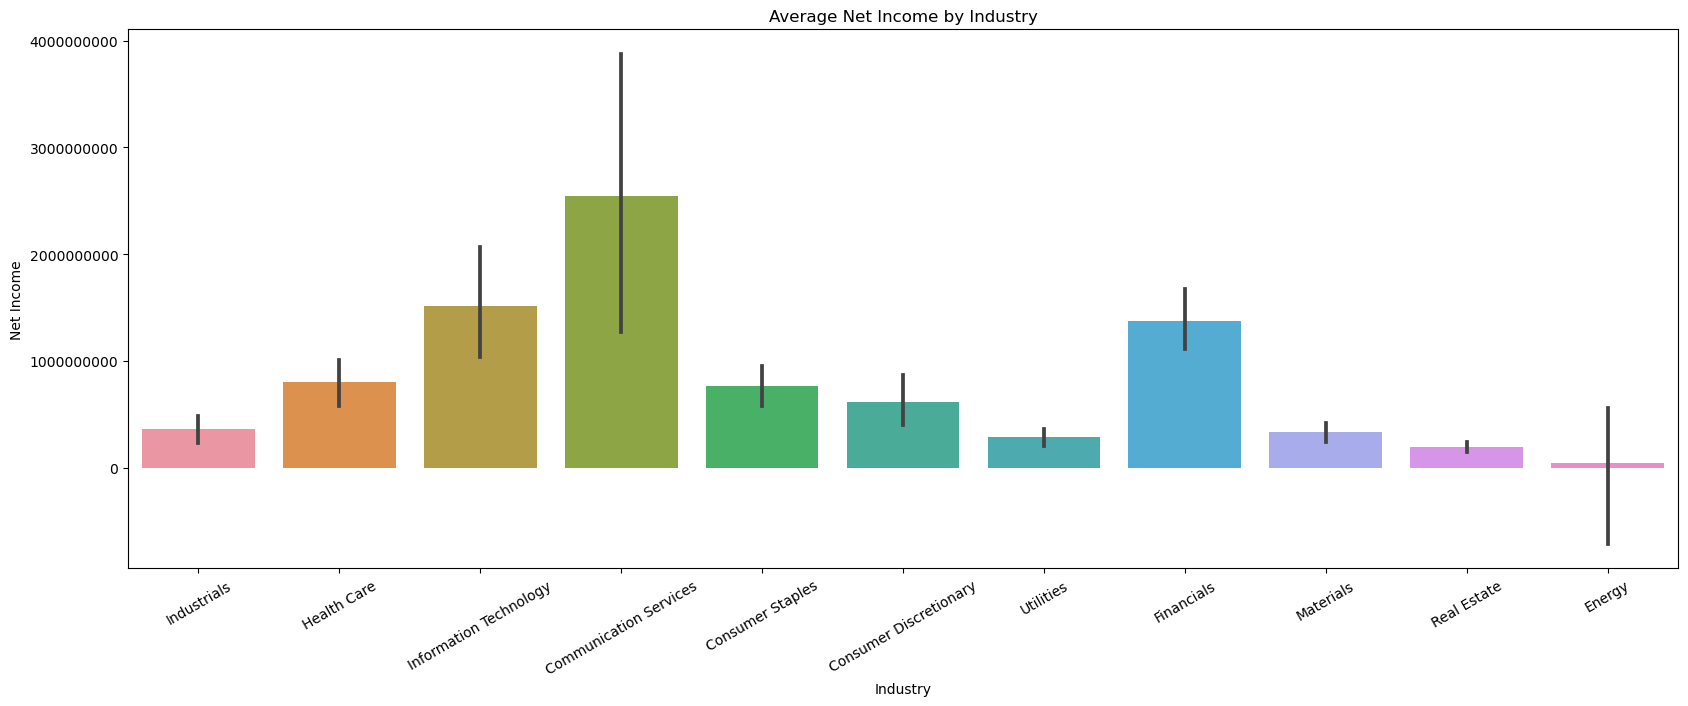

In [13]:
# Bar plot depicting average net income by industry
plt.figure(figsize=(20,7))
sns.barplot(data = df_merge, x='Industry', y='Net Income')
plt.title('Average Net Income by Industry')
plt.xticks(rotation=30)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

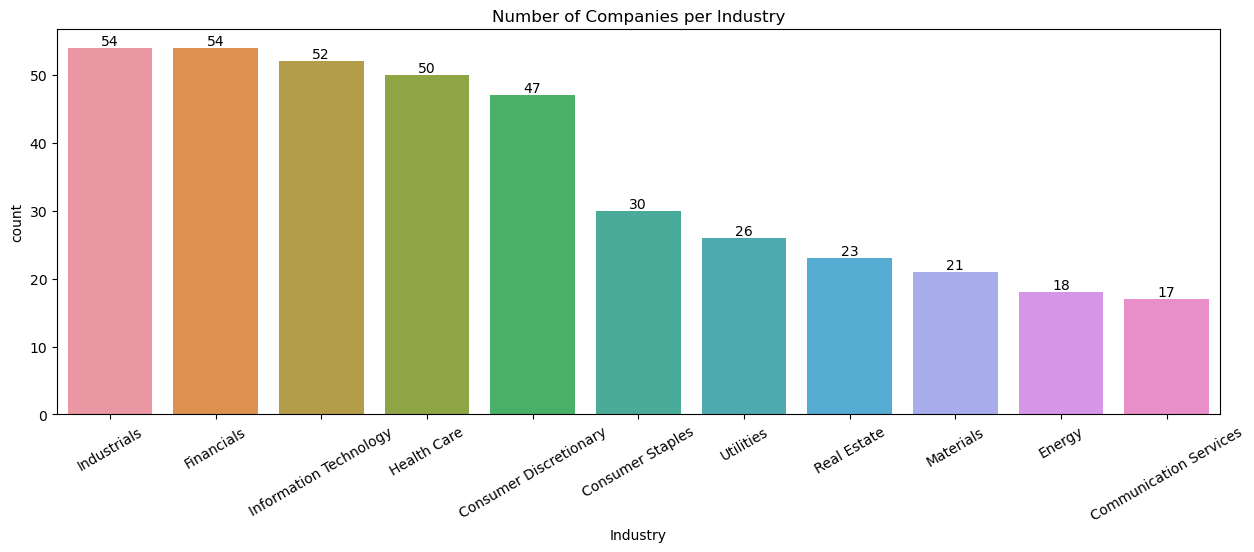

In [14]:
# Count plot of companies for each industry
plt.figure(figsize=(15,5))
industry_count = sns.countplot(data=df_summary, x='Industry', order = df_summary['Industry'].value_counts(ascending=False).index)
plt.title('Number of Companies per Industry')
plt.xticks(rotation=30)

for i in industry_count.containers:
    industry_count.bar_label(i)
    
plt.show()

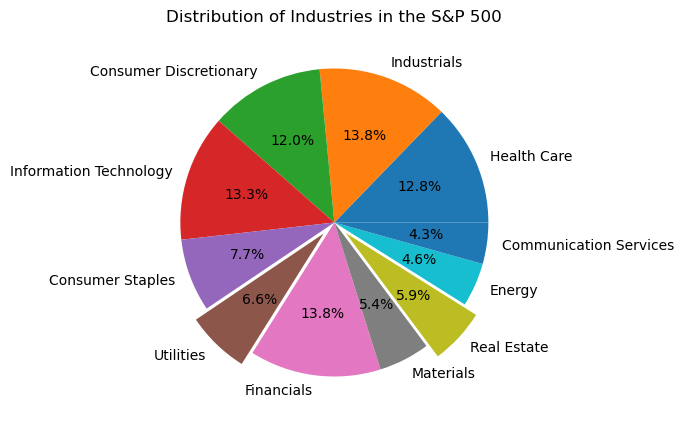

In [15]:
# Visualizing the number of companies per industry in a pie chart
industries = df_summary['Industry'].unique()

industry_count = {}
for industry in industries:
    industry_count[industry] = 0

for _, row in df_summary.iterrows():
    industry_temp = row['Industry']
    industry_count[industry_temp] += 1
    
keys = list(industry_count.keys())
counts = list(industry_count.values())

plt.figure(figsize=(10,5))
plt.pie(counts, labels=keys, autopct='%.1f%%', explode = (0, 0, 0, 0, 0, 0.1, 0, 0 ,0.1 ,0 ,0))
plt.title('Distribution of Industries in the S&P 500')
plt.show()

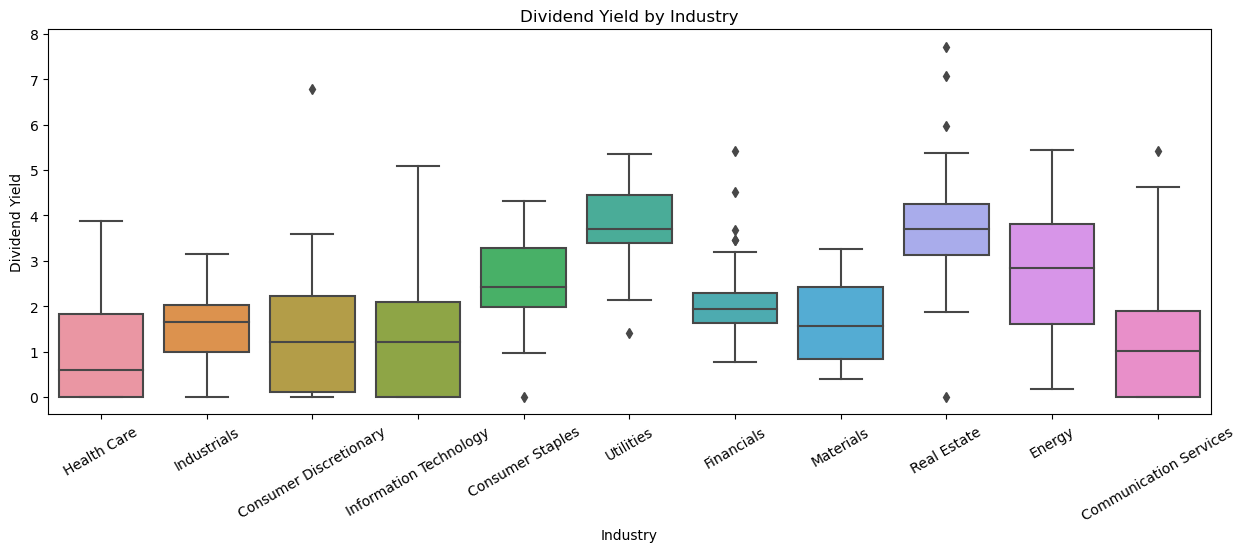

In [16]:
# Box plot showing dividend yield by industry
plt.figure(figsize=(15,5))
sns.boxplot(data = df_summary, x='Industry', y='Dividend Yield')
plt.title('Dividend Yield by Industry')
plt.xticks(rotation=30)
plt.show()

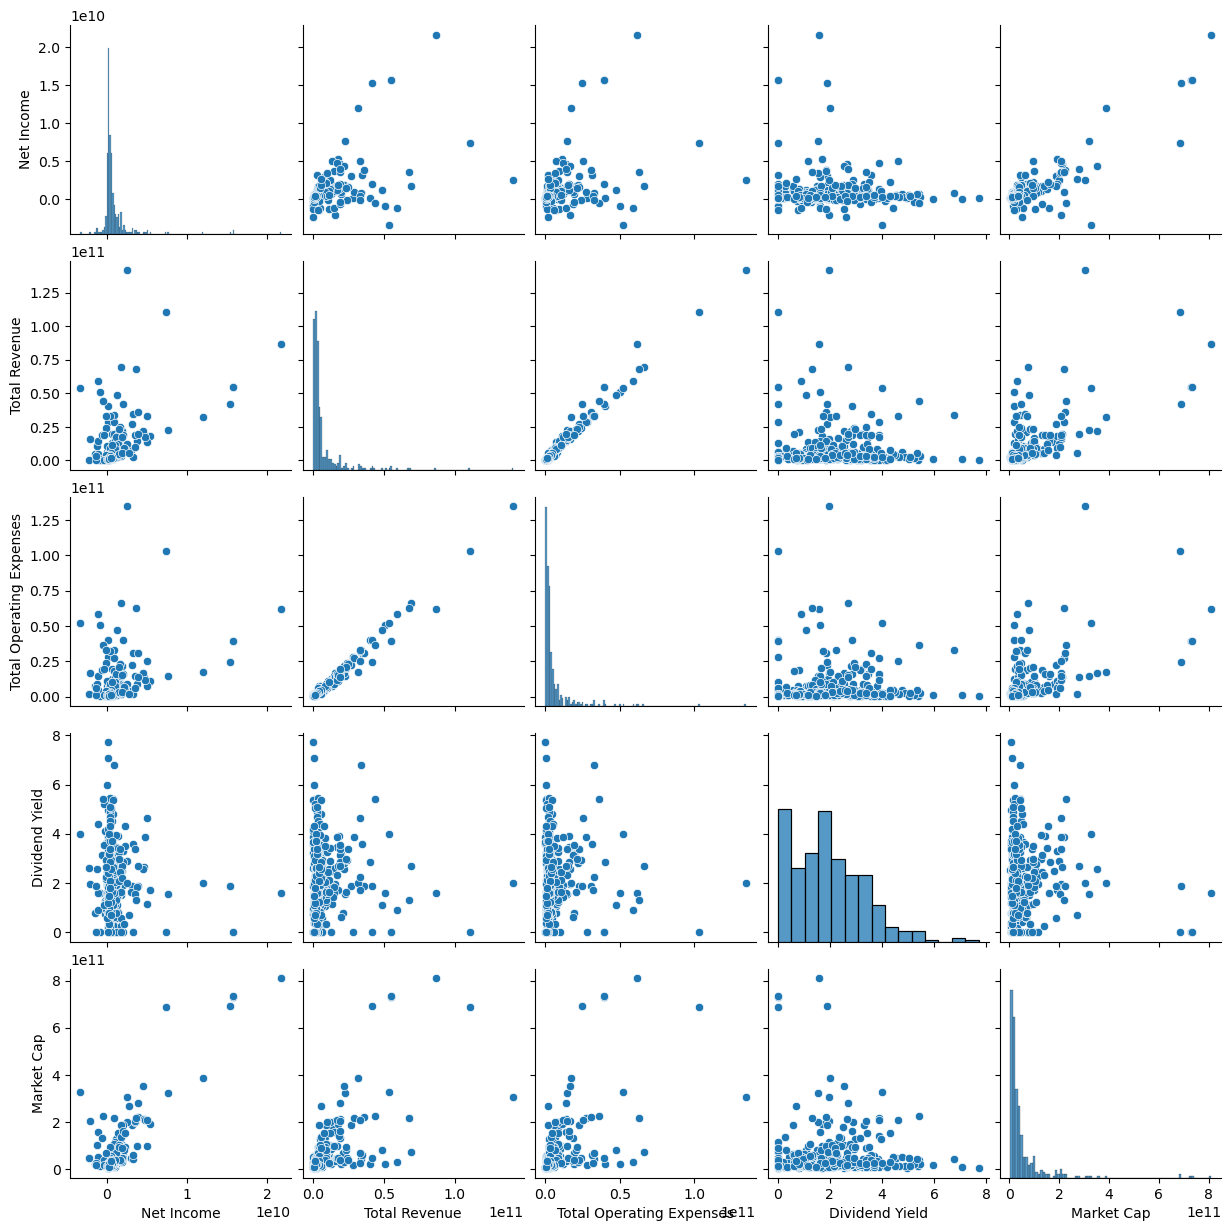

In [17]:
# creating pair plot to see relation between various numeric fields
fin_data = df_summary[['Net Income','Total Revenue','Total Operating Expenses','Dividend Yield','Market Cap']]
sns.pairplot(fin_data)

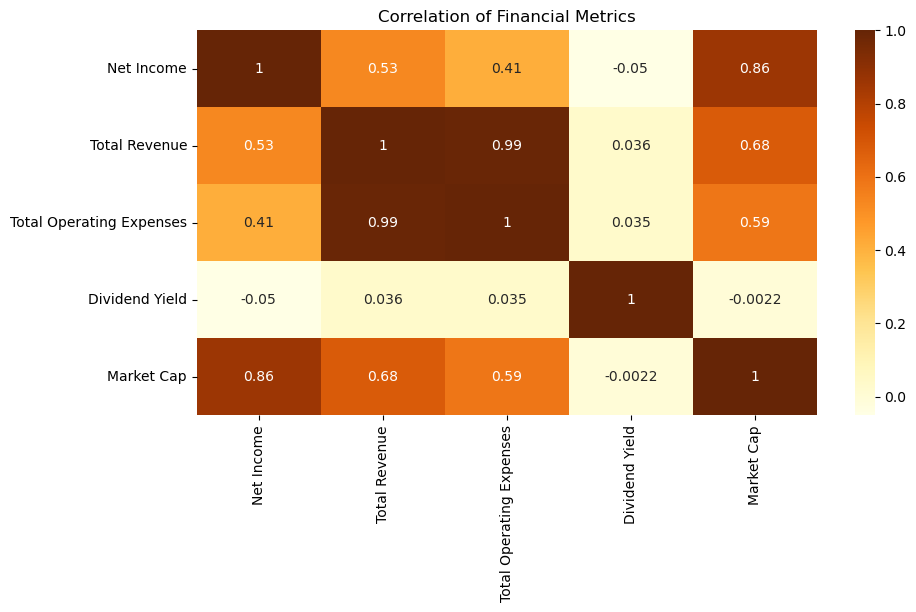

In [18]:
plt.figure(figsize=(10,5))

# Correlation heat map
sns.heatmap(fin_data.corr(), annot=True, cmap='YlOrBr')
plt.title('Correlation of Financial Metrics')
plt.show()

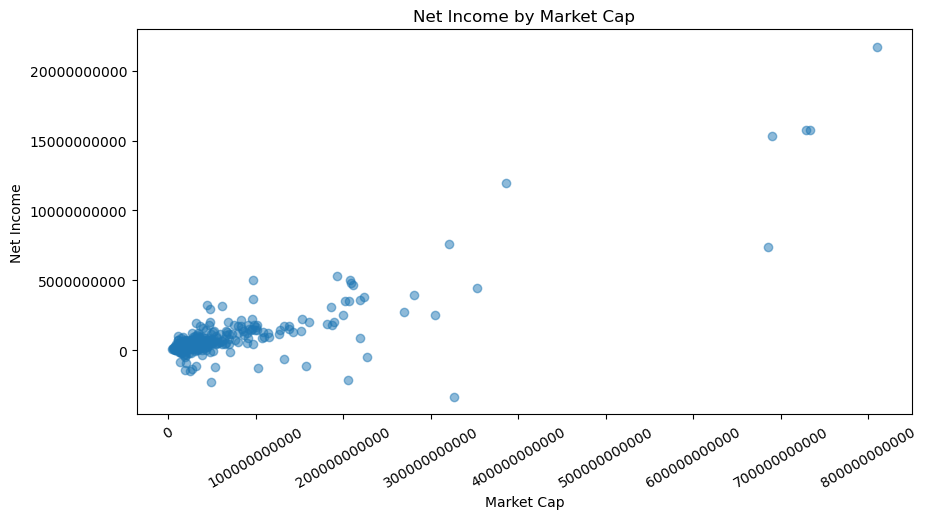

In [19]:
# Scatter plot showing relation between net income and market cap
plt.figure(figsize=(10,5))
plt.scatter(data=df_summary, x='Market Cap', y='Net Income', alpha=0.5)
plt.title('Net Income by Market Cap')
plt.xlabel('Market Cap')
plt.ylabel('Net Income')
plt.ticklabel_format(style='plain')
plt.xticks(rotation=30)
plt.show()

In [20]:
# Test train split for scikit-learn linear regression model
x_train, x_test, y_train, y_test = train_test_split(df_summary['Market Cap'], df_summary['Net Income'])

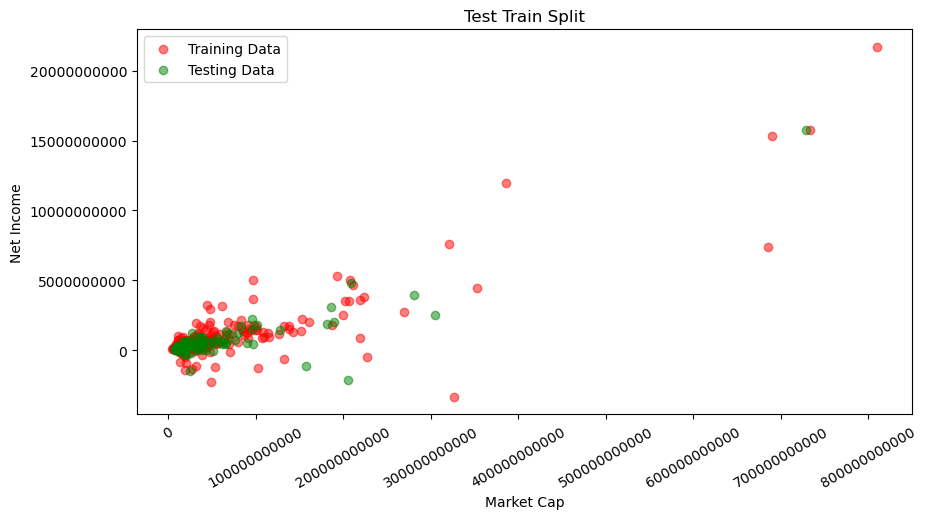

In [21]:
# Test train split visualization
plt.figure(figsize=(10,5))
plt.scatter(x_train, y_train, label='Training Data', color='r', alpha=0.5)
plt.scatter(x_test, y_test, label='Testing Data', color='g', alpha=0.5)
plt.ticklabel_format(style='plain')
plt.xticks(rotation=30)
plt.legend()
plt.title('Test Train Split')
plt.xlabel('Market Cap')
plt.ylabel('Net Income')
plt.show()

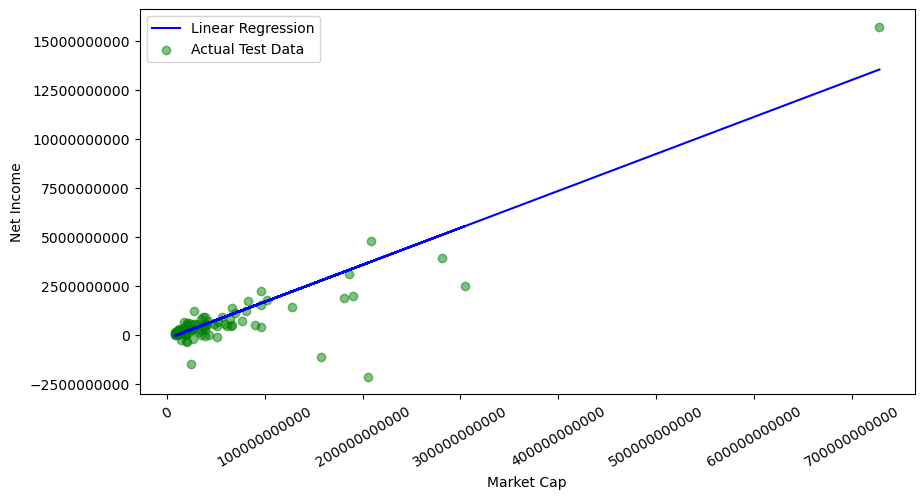

In [22]:
# Creating and training linear model
lr = LinearRegression()
lr.fit(x_train.values.reshape(-1,1), y_train.values)

# Using linear model to predict test data
prediction = lr.predict(x_test.values.reshape(-1,1))

# Plotting prediction line against actual test data
plt.figure(figsize=(10,5))
plt.plot(x_test, prediction, label='Linear Regression', color='b')
plt.scatter(x_test, y_test, label='Actual Test Data', color='g', alpha = 0.5)
plt.ticklabel_format(style='plain')
plt.xticks(rotation=30)
plt.xlabel('Market Cap')
plt.ylabel('Net Income')
plt.legend()
plt.show()

In [23]:
# Predict Net Income of company with Market Cap of 300 billion
lr.predict(np.array([[300000000000]]))[0]

5478342120.667273

In [24]:
# Score model
score = lr.score(x_test.values.reshape(-1,1), y_test.values)
print(f'The coefficient of determination (r^2): {score}\nThis indicates that {round(score,4)*100}% of the variation in Net Income is attributable to the company\'s Market Cap.' )

correlation = math.sqrt(abs(score))
print(f'Correlation (r): {round(correlation,2)}' )

The coefficient of determination (r^2): 0.728770673881558
This indicates that 72.88% of the variation in Net Income is attributable to the company's Market Cap.
Correlation (r): 0.85


## Summary:
Step 4: Findings, reflections, challenges, etc.

### Goals / Objectives:

1. How does net income differ by industry/sector? What is the distribution of industries like for companies in the S&P 500?

    - Examining 2021 stock data reveals that, among the 11 industries, Communication Services exhibited the highest average net income but also the greatest variability. Conversely, the Energy sector struggled in 2021, recording the lowest average net income. Utilities, Materials, and Real Estate also ranked among the bottom five in net income for the year.
   
    - It is also important to note that the countplot and pie chart highlight that Communication Service companies constitute only 4.3% (14 out of 392) of the dataset. In contrast, Industrials and Financials led the pack, while Utilities and Real Estate comprised of 6.6% and 5.9% of the companies, respectively.

2. How can information on these companies be used by investors to make financial decisions?

    - Despite Energy, Utilities, and Real Estate recording lower net incomes, the _Dividend Yield by Industry_ box plot indicates that these industries had the highest median dividend yields. This is important for investors; while these industries may not yield significant capital gains, they produce returns in the form of higher dividend yields. One such company in the Real Estate industry, for example, had nearly an 8% dividend yield in 2021.

3. What relations exist between S&P 500 companies and key financial metrics?

    - The pairplot and correlation heat map indicate relations between various financial metrics such as net income, dividend yield, market cap, etc. Notably, total revenue and total operating expenses exhibit a nearly perfect correlation, as indicated by their 0.99 correlation coefficient.
    - On the other hand, there does not appear to be a relation between dividend yield and the other metrics, as the correlation is often very weak and near 0.
    - Meanwhile, market cap and net income display a strong correlation of 0.86
    - That being said, in order to take a closer look into the relation between net income and market cap, I created a linear regression model to test the predictive power of the two metrics.
    - The ensuing scatter plots depict the data before and after it was separated into training and testing sets for the linear regression model. The resulting plot shows the regression line plotted against the randomly chosen test data. The model in some instances appears to be a good fit, and could serve as a moderate estimator for net income given market cap. Further testing can then be completed to score the model by finding find the coefficient of determination (r^2) as well as the correlation coefficient (r). (Note that scores vary depending on the test/train split).

### Challenges / Next Steps:

Obtaining datasets containing the necessary information for my analysis posed a particular challenge at the project's inception. Ultimately, I acquired three Kaggle datasets and utilized pandas dataframes to consolidate and cleanse the data into a unified dataframe. Moving forward, I plan to incorporate web scraping from Yahoo Finance to access more pertinent and current information regarding total stock market data, as opposed to relying solely on S&P 500 stock data. The additional data will also be useful for my models, considering that the current linear regression model is based on 392 data points. Having more data over an extended period of time will also allow me to incorporate time series analysis into my project, resultantly enhancing the depth of my overall analysis.
